In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


# Read and explore dataset

In [2]:
data_bottle = pd.read_csv("../input/calcofi/bottle.csv")
data_bottle.head()

/tmp/ipykernel_18/3769466318.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data_bottle = pd.read_csv("../input/calcofi/bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

## Visualize null values

In [4]:
missing_val_count_by_column = (data_bottle.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 66, dtype: int64


<Axes: >

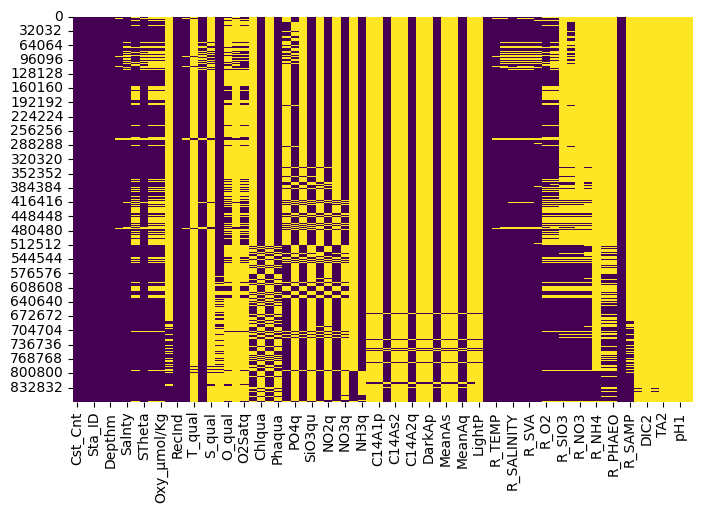

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(data_bottle.isna(),cbar=False,cmap='viridis')

So, we are going to select only the following features:

In [6]:
bottle=data_bottle.iloc[:,[0,4,5,6,7,8]]
bottle

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta
0,1,0,10.500,33.4400,NaN,25.64900
1,1,8,10.460,33.4400,NaN,25.65600
2,1,10,10.460,33.4370,NaN,25.65400
3,1,19,10.450,33.4200,NaN,25.64300
4,1,20,10.450,33.4210,NaN,25.64300
...,...,...,...,...,...,...
864858,34404,0,18.744,33.4083,5.805,23.87055
864859,34404,2,18.744,33.4083,5.805,23.87072
864860,34404,5,18.692,33.4150,5.796,23.88911
864861,34404,10,18.161,33.4062,5.816,24.01426


### Deal with missing values

/tmp/ipykernel_18/688983413.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bottle.fillna(method='ffill', inplace=True)


<Axes: >

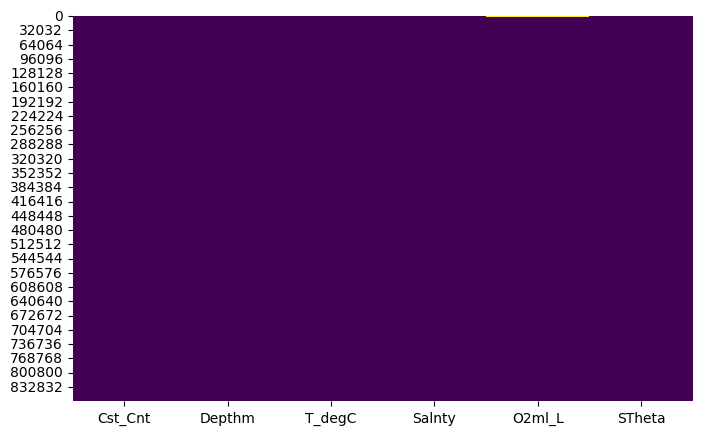

In [7]:
bottle=bottle.reset_index(drop=True)
bottle.fillna(method='ffill', inplace=True)
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(bottle.isna(),cbar=False,cmap='viridis')

## Pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

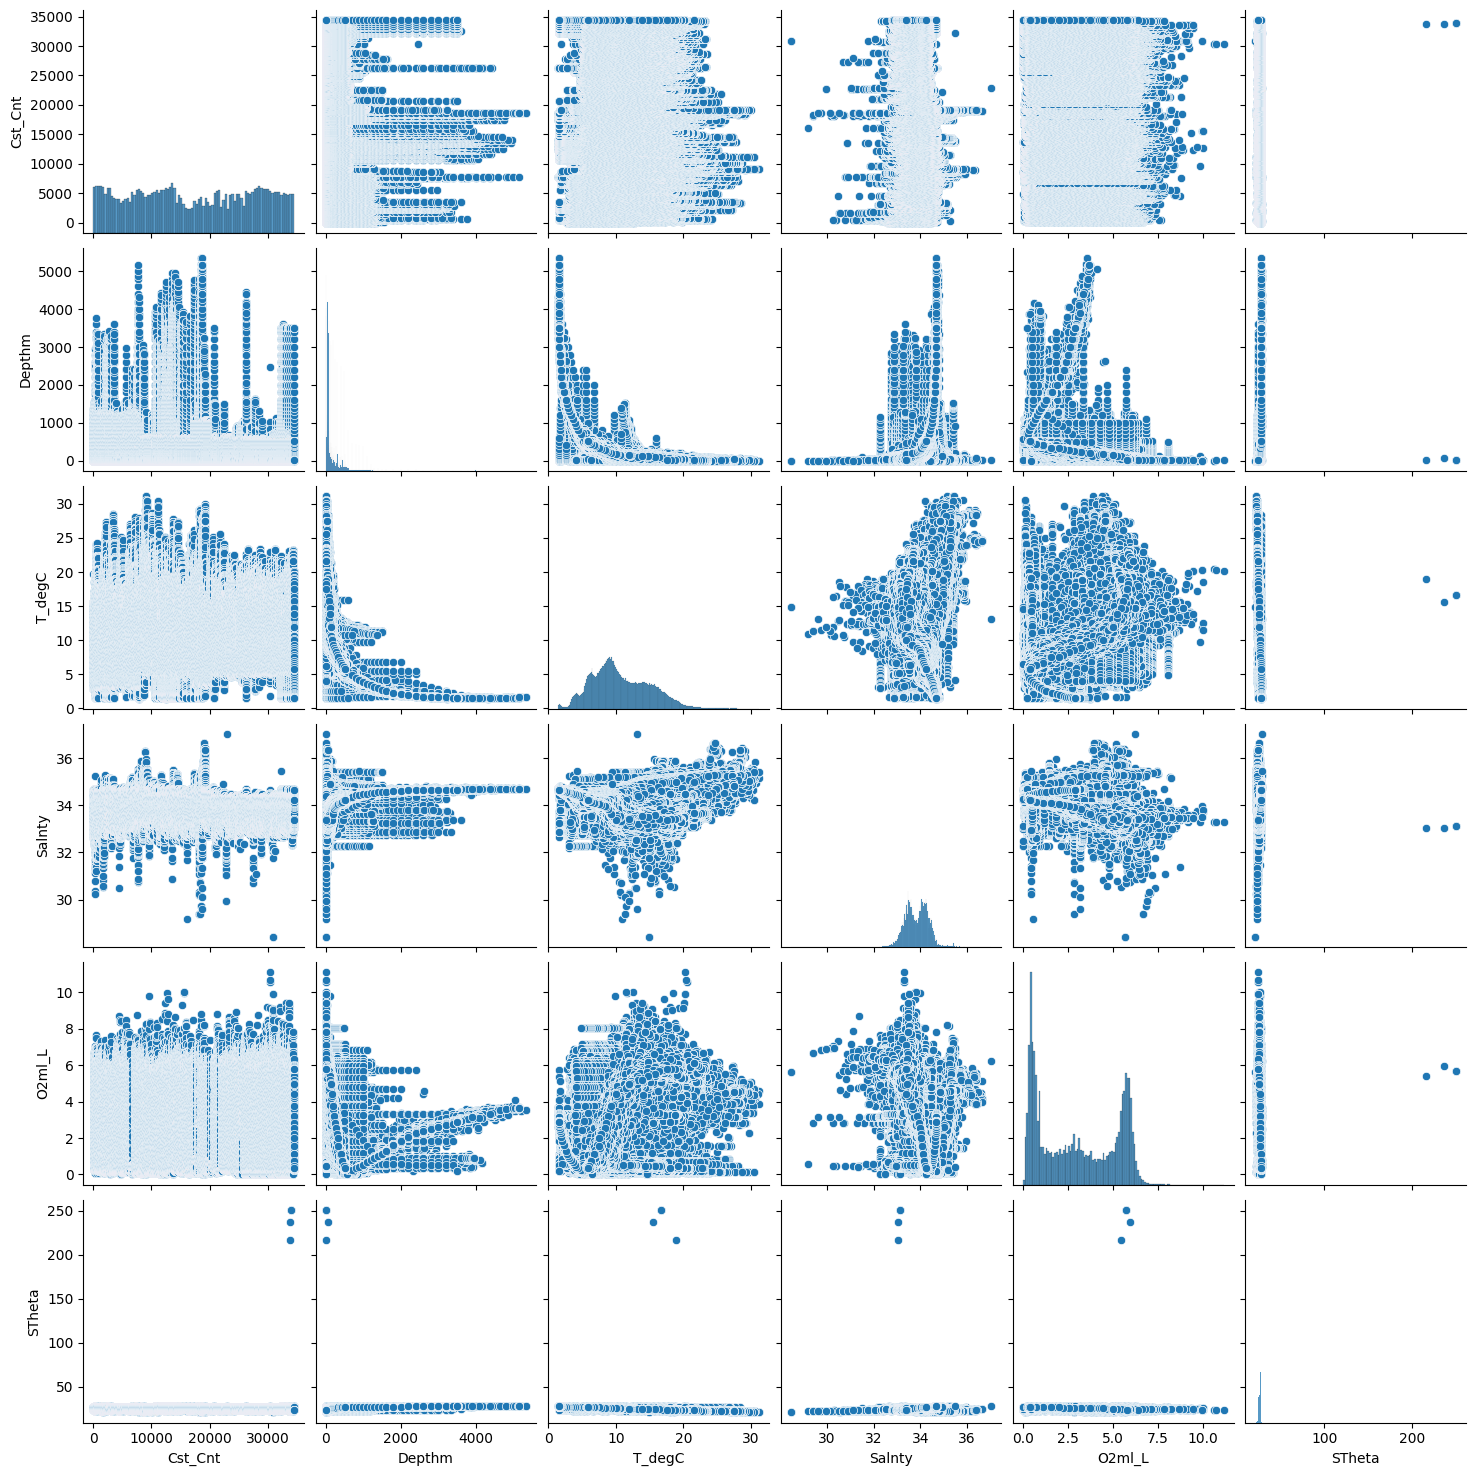

In [8]:
sns.pairplot(bottle)

## Correlation matrix

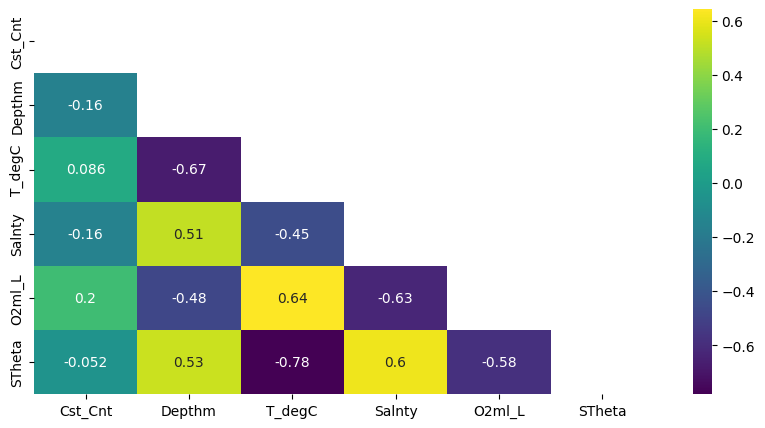

In [9]:
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(bottle.corr(numeric_only = True), dtype=bool))
sns.heatmap(bottle.corr(numeric_only = True), cbar = True, annot = True, cmap="viridis", mask = mask);

# **Train prediction models**

## Split the dataset

Predict temperature only from salinity 

Take 20% of the dataset as test set

In [10]:
from sklearn.model_selection import train_test_split

X = np.array(bottle['Salnty']).reshape(-1, 1)
y = np.array(bottle['T_degC']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## **Linear regression model**

Calculate regression on how temperature depends on salinity


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

### Visualize results

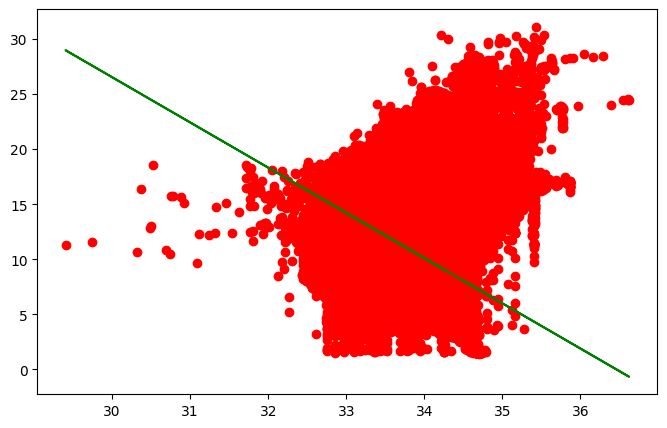

In [12]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_predict, color='g')
plt.show()

### Scores

In [13]:
from sklearn.metrics import mean_squared_error,r2_score

accuracy_score = lr.score(X_test, y_test)                      
print("Linear Regression - Accuracy Score: " + "{:.1%}".format(accuracy_score))
print("Linear Regression - R2 Score: " +"{:.3}".format(r2_score(y_test, y_predict)))
print("Linear Regression - MSE: " +"{:.3}".format(mean_squared_error(y_test, y_predict)))

Linear Regression - Accuracy Score: 20.3%
Linear Regression - R2 Score: 0.203
Linear Regression - MSE: 14.4


## **Decision tree**

In [14]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()         
dt_reg.fit(X_train,y_train)
dt_predict = dt_reg.predict(X_test)

### Visualize results

/tmp/ipykernel_18/1401279254.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)


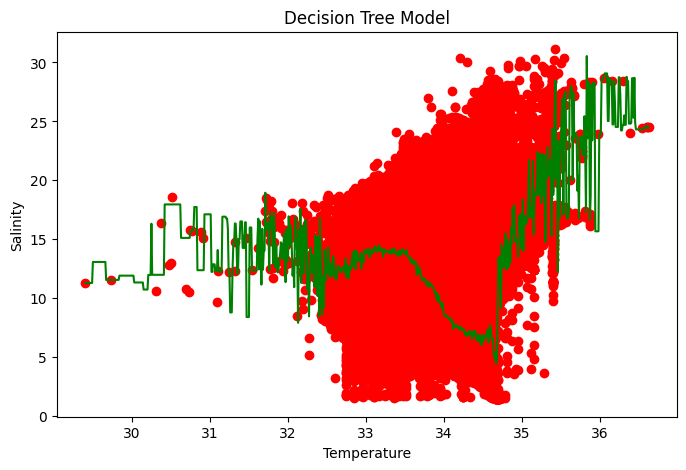

In [15]:
plt.scatter(X_test,y_test, color="red")                           
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

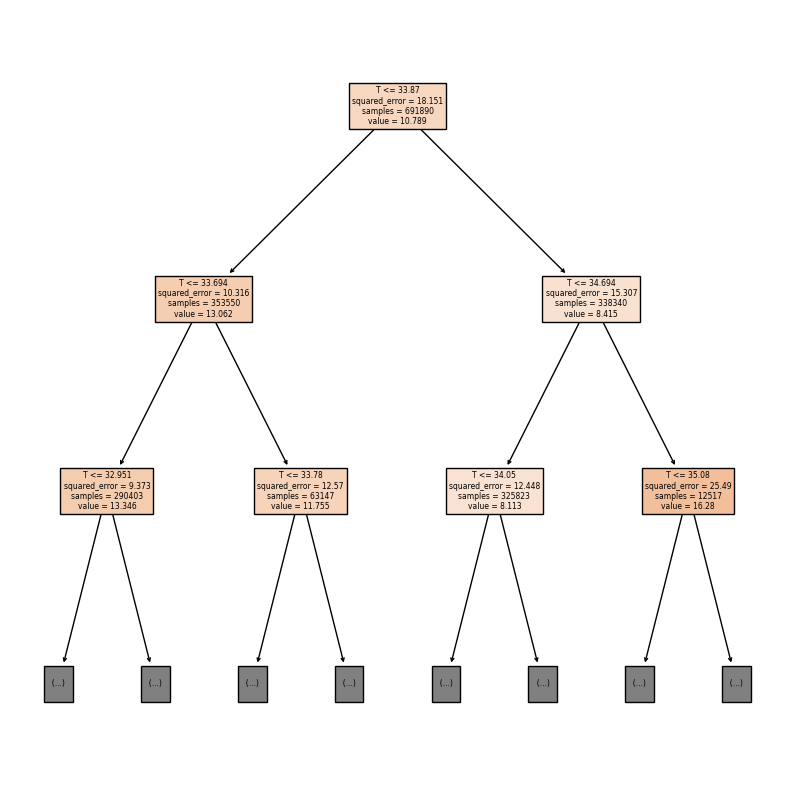

In [16]:
from sklearn.tree import plot_tree
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt_reg,feature_names="Temperature",filled=True,max_depth=2);

### Scores

In [17]:
accuracy_score = dt_reg.score(X_test, y_test)                      
print("Decision tree - Accuracy Score: " + "{:.1%}".format(accuracy_score))
print("Decision tree - R2 Score: " +"{:.3}".format(r2_score(y_test, dt_predict)))
print("Decision tree - MSE: " +"{:.3}".format(mean_squared_error(y_test, dt_predict)))

Decision tree - Accuracy Score: 41.8%
Decision tree - R2 Score: 0.418
Decision tree - MSE: 10.5


## **KNN**

In [18]:
from sklearn.neighbors import KNeighborsRegressor

k=100
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train,y_train)

pred_y = knn.predict(X_test)

### Scores

In [19]:
accuracy_score = knn.score(X_test, y_test)                      
print("KNN - Accuracy Score: " + "{:.1%}".format(accuracy_score))
print("KNN - R2 Score: " +"{:.3}".format(r2_score(y_test, pred_y)))
print("KNN - MSE: " +"{:.3}".format(mean_squared_error(y_test, pred_y)))

KNN - Accuracy Score: 41.7%
KNN - R2 Score: 0.417
KNN - MSE: 10.5
